`Ghg emissions intensity - done`

Questions:
- do i need to standardize the currency? (i.e. convert to USD)
- I am dropping ghg2_based_on because it is not making a siginicant difference
- Note that revenue is the denominator, that is the total revenue adjusted to USD
- I am keeping ghg_int_change which is the change in intensity and should be a comparable metric to benchmark

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [32]:
df = pd.read_stata("../../data/CDP Cleaning/cleaned outputs/cdp_ghg_int.dta")
df.head()

,id,year,ghg_int_figure,ghg2_based_on,ghg_int_revenue,ghg_int_change,ghg_int_reason,cdp_currency,currency_ex
0,44,2014.0,1.870000e+00,,NaN,-29.0,"We have reduced staff numbers, closed offices ...",GBP,1.6700
1,44,2016.0,6.500000e+00,location,2.240271e+02,-11.0,"For the purposes of this question, our chosen ...",GBP,1.3101
2,44,2017.0,2.000000e-07,market,2.061958e+09,-76.0,The main reason for the decrease in emissions ...,GBP,1.2952
3,44,2018.0,0.000000e+00,location,1.835115e+09,129.0,Intensity figure entered as zero here due to l...,GBP,1.2878
4,53,2011.0,5.064000e-05,,NaN,-12.0,The total CO2 emissions derived from abertis’s...,EUR,NaN


In [33]:
df.shape

(23617, 9)

In [34]:
df.columns

Index(['id', 'year', 'ghg_int_figure', 'ghg2_based_on', 'ghg_int_revenue',
       'ghg_int_change', 'ghg_int_reason', 'cdp_currency', 'currency_ex'],
      dtype='object')

In [35]:
df['ghg2_based_on'].value_counts()

ghg2_based_on
location    10179
             7765
market       5673
Name: count, dtype: int64

In [36]:
df[df['id'] == 1115]

,id,year,ghg_int_figure,ghg2_based_on,ghg_int_revenue,ghg_int_change,ghg_int_reason,cdp_currency,currency_ex
1250,1115,2011.0,5.370000e-07,,NaN,-0.58,,NOK,NaN
1251,1115,2012.0,5.000000e-07,,NaN,-4.20,This reduction is largely due to implemented a...,NOK,0.169457
1252,1115,2013.0,5.000000e-07,,NaN,4.00,The increase of tonnes CO2 emissions per total...,NOK,0.167569
1253,1115,2014.0,5.000000e-07,,NaN,-1.10,This reduction is mainly due to implemented ac...,NOK,0.161460
1254,1115,2015.0,5.000000e-07,,NaN,-7.00,,NOK,0.121177
1255,1115,2016.0,2.600000e-07,location,4.069318e+09,-12.00,The reason for change in current intensity fig...,NOK,0.120469
1256,1115,2017.0,3.100000e-07,market,4.528111e+09,-24.30,Decrease in current KPI value was caused by em...,NOK,0.126767
1257,1115,2018.0,1.000000e-06,market,4.523598e+09,14.90,The reason for change in current KPI value is ...,NOK,0.119907
1258,1115,2019.0,3.950000e-07,market,3.871223e+09,-1.00,The reason for the decrease in the current KPI...,NOK,0.111534
1259,1115,2020.0,2.500000e-07,market,4.099103e+09,-38.00,The KPI value has decreased due to around 8% i...,NOK,0.111829


In [37]:
# count duplicate id, year rows
temp = df[df.duplicated(subset=['id', 'year'], keep=False)]
rows_to_drop = temp.loc[temp['ghg2_based_on'] == 'market']

In [38]:
df[df.duplicated(subset=['id', 'year'], keep=False)]

,id,year,ghg_int_figure,ghg2_based_on,ghg_int_revenue,ghg_int_change,ghg_int_reason,cdp_currency,currency_ex
150,220,2019.0,4.015000e-06,market,2.656158e+10,2.30,The increase can be explained by a change in m...,EUR,1.1129
151,220,2019.0,4.130000e-06,location,2.656158e+10,NaN,Please note there has been a change in methodo...,EUR,1.1129
152,220,2020.0,3.699000e-06,market,2.771648e+10,-7.88,While the unit total revenue remained almost u...,EUR,1.1831
153,220,2020.0,3.802400e-06,location,2.771648e+10,-7.94,While the unit total revenue remained almost u...,EUR,1.1831
154,220,2021.0,3.037500e-06,location,2.301743e+10,-20.12,"Less consumption of fuel, electricity and heat...",EUR,1.1767
...,...,...,...,...,...,...,...,...,...
23362,876128,2022.0,7.170000e-07,market,7.426901e+07,NaN,In 2022 GOG established a 2019 GHG baseline du...,USD,1.0000
23413,880513,2022.0,2.640000e+00,location,1.243938e+08,NaN,This is our first year reporting and this figu...,USD,1.0000
23414,880513,2022.0,2.780000e+00,market,1.243938e+08,NaN,This is our first year reporting and this figu...,USD,1.0000
23603,895546,2022.0,3.400000e-04,location,1.446685e+08,-6.00,The intensity ratio expresses absolute Scope 1...,EUR,1.0129


In [13]:
rows_to_drop

,id,year,ghg_int_figure,ghg2_based_on,ghg_int_revenue,ghg_int_change,ghg_int_reason,cdp_currency,currency_ex
150,220,2019.0,4.015000e-06,market,2.656158e+10,2.30,The increase can be explained by a change in m...,EUR,1.112900
152,220,2020.0,3.699000e-06,market,2.771648e+10,-7.88,While the unit total revenue remained almost u...,EUR,1.183100
155,220,2021.0,2.942700e-06,market,2.301743e+10,-20.60,"Less consumption of fuel, electricity and heat...",EUR,1.176700
198,252,2022.0,2.300000e-01,market,2.549571e+04,-3.10,Scope 1+2 (market-based) GHG emissions / EUR m...,EUR,1.012900
301,333,2020.0,4.987500e-06,market,1.117130e+10,-25.00,To calculate the -25% (DECREASE) change from t...,USD,1.000000
...,...,...,...,...,...,...,...,...,...
23254,866328,2022.0,3.070000e-07,market,5.510132e+08,0.00,基準年と報告年が同じであり、前年の排出量を算定していないため,JPY,0.007392
23311,870299,2022.0,5.296810e-05,market,3.000000e+08,NaN,This is the first year Polyram has calculated ...,USD,1.000000
23362,876128,2022.0,7.170000e-07,market,7.426901e+07,NaN,In 2022 GOG established a 2019 GHG baseline du...,USD,1.000000
23414,880513,2022.0,2.780000e+00,market,1.243938e+08,NaN,This is our first year reporting and this figu...,USD,1.000000


In [14]:
# drop rows
df.drop(rows_to_drop.index, inplace=True)

# drop remaining duplicates, keeping the last
df.drop_duplicates(subset=['id', 'year'], inplace=True, keep='last')

In [15]:
# count unique values of ghg2_based_on
df['ghg2_based_on'].value_counts()

ghg2_based_on
location    10179
             7764
market       5411
Name: count, dtype: int64

In [16]:
# count number of na values in each column
df.isna().sum()

id                    0
year                  0
ghg_int_figure      182
ghg2_based_on         0
ghg_int_revenue    8267
ghg_int_change     1019
ghg_int_reason        0
cdp_currency          0
currency_ex        1402
dtype: int64

## Working on ghg_int_revenue
- taking the log1p and plotting the distribuiton

In [17]:
df.drop(columns=['ghg_int_revenue', 'currency_ex', 'cdp_currency', 'ghg_int_reason', 'ghg2_based_on'], inplace=True)

In [18]:
# count number of na values in each column
df.isna().sum()

id                   0
year                 0
ghg_int_figure     182
ghg_int_change    1019
dtype: int64

In [19]:
# drop rows where ghg_int_change is more than 3 standard deviations from the mean
df = df[np.abs(df['ghg_int_change'] - df['ghg_int_change'].mean()) <= (3 * df['ghg_int_change'].std())]

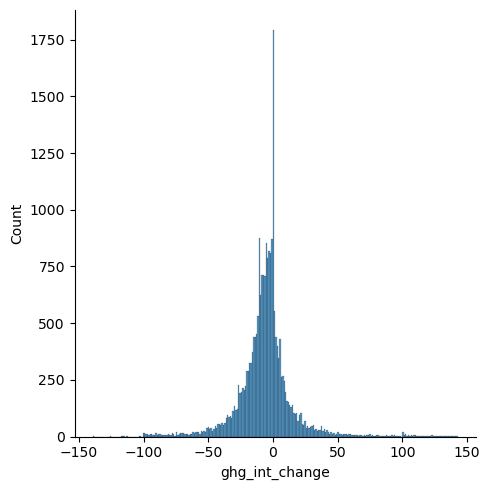

In [20]:
sns.displot(df['ghg_int_change'])

In [21]:
# displot of ghg_int_figure, ghg_int_change, usd_ghg_revenue
df['ghg_int_figure'] = np.log1p(df['ghg_int_figure'])

In [22]:
# for each column that is not id, year, ghg2_based_on, create indicator columns to mark na values and fill na with 0
for col in df.columns:
    if col not in ['id', 'year', 'ghg2_based_on']:
        df[col + '_na'] = df[col].isna().astype(int)
        df[col].fillna(0, inplace=True)

In [23]:
df.shape

(22159, 6)

In [24]:
df.isna().sum()

id                   0
year                 0
ghg_int_figure       0
ghg_int_change       0
ghg_int_figure_na    0
ghg_int_change_na    0
dtype: int64

In [25]:
df.head()

,id,year,ghg_int_figure,ghg_int_change,ghg_int_figure_na,ghg_int_change_na
0,44,2014.0,1.054312e+00,-29.0,0,0
1,44,2016.0,2.014903e+00,-11.0,0,0
2,44,2017.0,2.000000e-07,-76.0,0,0
3,44,2018.0,0.000000e+00,129.0,0,0
4,53,2011.0,5.063872e-05,-12.0,0,0


In [26]:
df.shape

(22159, 6)

In [27]:
# convert bool to int in the df
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

In [28]:
df.columns

Index(['id', 'year', 'ghg_int_figure', 'ghg_int_change', 'ghg_int_figure_na',
       'ghg_int_change_na'],
      dtype='object')

In [29]:
# save to csv
df.to_csv('../../data/processed/cdp_ghg_int_processed.csv', index=False)

Next:
- keep EDA
- test baseline model
- chose how to aggregate the data